In [184]:
import numpy as np
import pandas as pd
import re
import matplotlib
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from datetime import timedelta

# Importing Data

In [185]:
churn_data = pd.read_csv('labeled_data_with_metrics.csv')
churn_data.columns

Index(['Unnamed: 0', 'distinct_id', 'locationSetting', 'notificationSettings',
       'active_timespan', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown',
       'num_sessions', 'sessions_per_day', 'America/New_York',
       'America/Los_Angeles', 'America/Chicago', 'Asia/Kolkata',
       'America/Denver', 'other_timezone', 'commentAdded', 'commentLength',
       'churned', 'number_ratings', 'SQS', 'avg_session_duration',
       'time_delta_slope', 'session_time_slope', 'time_delta_slope_90',
       'session_time_slope_90'],
      dtype='object')

In [186]:
churn_data = churn_data.set_index('Unnamed: 0')

In [187]:
#Defining Features
X = churn_data[['SQS', 'avg_session_duration', 'Unknown', 'time_delta_slope',
       'session_time_slope','US']]
y = churn_data['churned']

# Decision Tree

In [188]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.833256351039261


Decision Tree accuracies at multiple max depths.

In [189]:
for i in range(5,35):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy at", i, "max depth:",metrics.accuracy_score(y_test, y_pred))

Accuracy at 5 max depth: 0.846189376443418
Accuracy at 6 max depth: 0.8457274826789838
Accuracy at 7 max depth: 0.8526558891454965
Accuracy at 8 max depth: 0.8609699769053117
Accuracy at 9 max depth: 0.859122401847575
Accuracy at 10 max depth: 0.8642032332563511
Accuracy at 11 max depth: 0.8577367205542725
Accuracy at 12 max depth: 0.854041570438799
Accuracy at 13 max depth: 0.8498845265588915
Accuracy at 14 max depth: 0.8480369515011548
Accuracy at 15 max depth: 0.8341801385681293
Accuracy at 16 max depth: 0.8434180138568129
Accuracy at 17 max depth: 0.8369515011547344
Accuracy at 18 max depth: 0.8374133949191686
Accuracy at 19 max depth: 0.8364896073903002
Accuracy at 20 max depth: 0.8346420323325635
Accuracy at 21 max depth: 0.8364896073903002
Accuracy at 22 max depth: 0.836027713625866
Accuracy at 23 max depth: 0.8374133949191686
Accuracy at 24 max depth: 0.8286374133949191
Accuracy at 25 max depth: 0.8318706697459585
Accuracy at 26 max depth: 0.8314087759815243
Accuracy at 27 max 

Final Decision Tree Model using hyperparameters

In [190]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8568129330254042


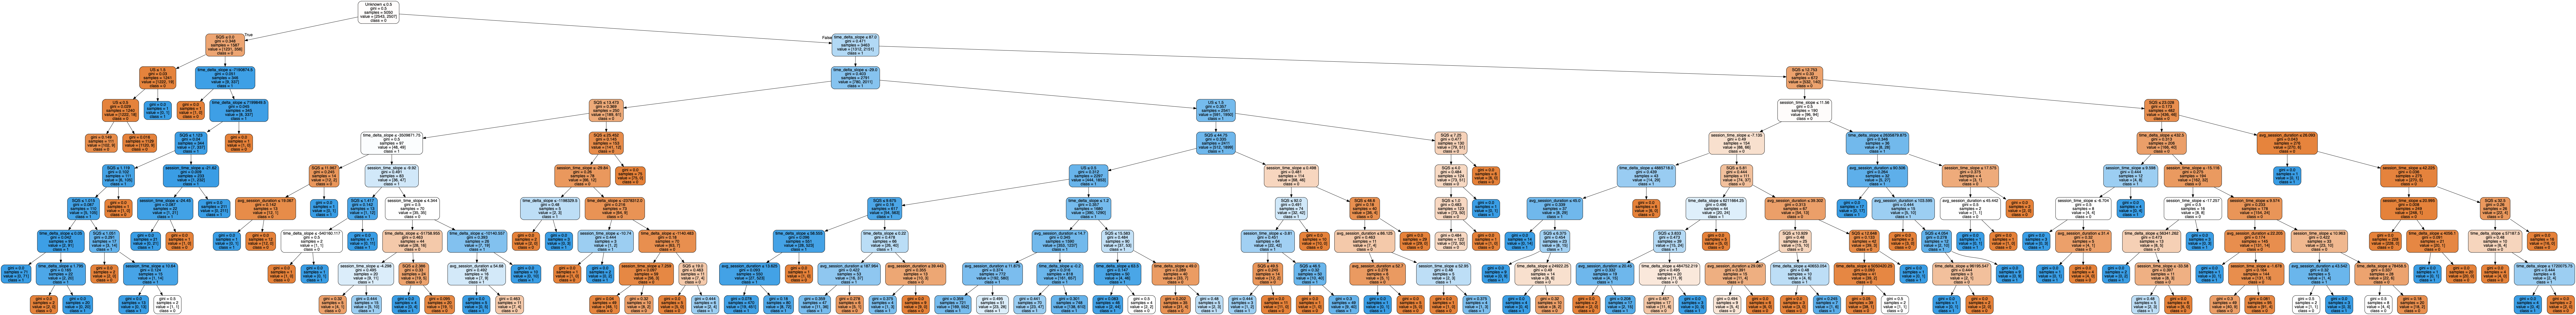

In [191]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn.png')
Image(graph.create_png())

In [192]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

SQS                     0.408558
time_delta_slope        0.287615
Unknown                 0.200811
session_time_slope      0.042448
US                      0.035422
avg_session_duration    0.025147
dtype: float64

No handles with labels found to put in legend.


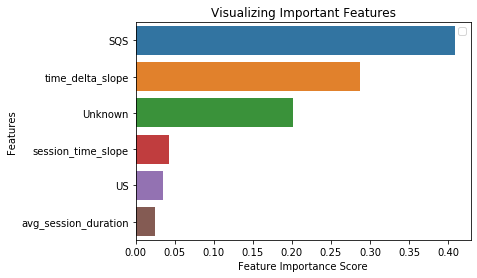

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

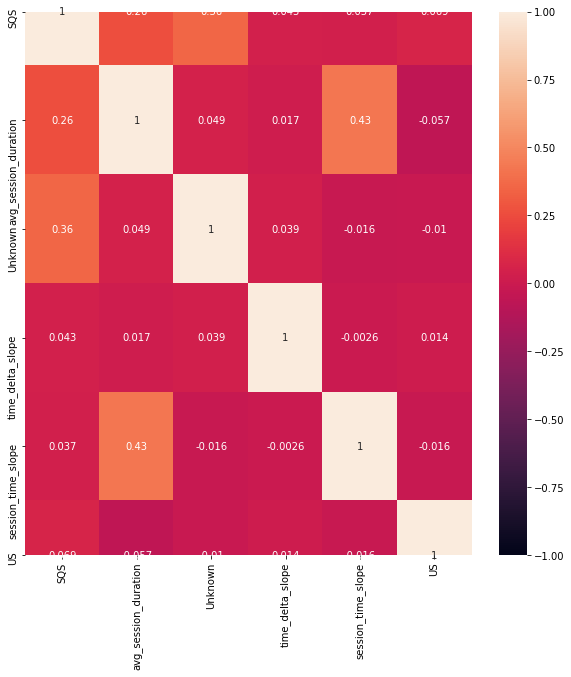

In [194]:
plt.figure(figsize=(10,10))
sns.heatmap((X.astype(float)).corr(), annot=True, vmin=-1, vmax=1);

In [195]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[856 207]
 [103 999]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1063
           1       0.83      0.91      0.87      1102

    accuracy                           0.86      2165
   macro avg       0.86      0.86      0.86      2165
weighted avg       0.86      0.86      0.86      2165



# Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier

for i in range(5,35):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100, max_depth=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy at", i, "max depth:",metrics.accuracy_score(y_test, y_pred))


Accuracy at 5 max depth: 0.8618937644341801
Accuracy at 6 max depth: 0.8651270207852194
Accuracy at 7 max depth: 0.8706697459584296
Accuracy at 8 max depth: 0.8711316397228638
Accuracy at 9 max depth: 0.8734411085450347
Accuracy at 10 max depth: 0.871593533487298
Accuracy at 11 max depth: 0.8702078521939954
Accuracy at 12 max depth: 0.8729792147806005
Accuracy at 13 max depth: 0.8720554272517321
Accuracy at 14 max depth: 0.869284064665127
Accuracy at 15 max depth: 0.8683602771362586
Accuracy at 16 max depth: 0.869284064665127
Accuracy at 17 max depth: 0.8688221709006928
Accuracy at 18 max depth: 0.8665127020785219
Accuracy at 19 max depth: 0.8618937644341801
Accuracy at 20 max depth: 0.8674364896073903
Accuracy at 21 max depth: 0.8655889145496536
Accuracy at 22 max depth: 0.8642032332563511
Accuracy at 23 max depth: 0.8642032332563511
Accuracy at 24 max depth: 0.8637413394919169
Accuracy at 25 max depth: 0.8655889145496536
Accuracy at 26 max depth: 0.8642032332563511
Accuracy at 27 max

Final Random Forest classifier with hyperparameters

In [214]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100, max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8734411085450347


In [215]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Unknown                 0.324467
SQS                     0.216878
time_delta_slope        0.179040
avg_session_duration    0.126635
US                      0.081297
session_time_slope      0.071684
dtype: float64

No handles with labels found to put in legend.


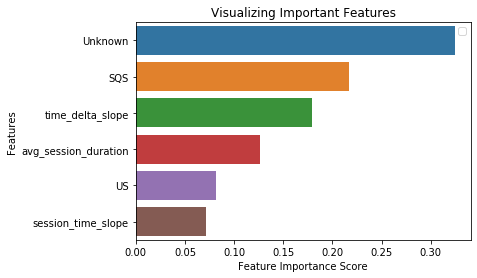

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [217]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 873  190]
 [  84 1018]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1063
           1       0.84      0.92      0.88      1102

    accuracy                           0.87      2165
   macro avg       0.88      0.87      0.87      2165
weighted avg       0.88      0.87      0.87      2165

